<a href="https://colab.research.google.com/github/Mennamedhattt/GUI-of-scientific-calculator/blob/main/coronacodeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dash import html, dcc, Dash, callback, Input, Output
import plotly.express as px
import pandas as pd

############################ DATASET ###############################
def load_dataset():
    # Load dataset from CSV
    corona_df = pd.read_csv("covid_19_clean_complete.csv")

    # Perform any necessary data cleaning or transformations here
    # For instance, you may want to group by country and aggregate on specific columns
    corona_df["Date"] = pd.to_datetime(corona_df["Date"])

    # Example transformations: Grouping data to focus on the latest date
    latest_data = corona_df[corona_df["Date"] == corona_df["Date"].max()]

    return corona_df, latest_data

corona_df, latest_data = load_dataset()

######################## CHARTS ##################################
def create_histogram(col_name):
    fig = px.histogram(latest_data, x=col_name, nbins=50)
    fig.update_traces(marker={"line": {"width": 2, "color": "black"}})
    fig.update_layout(paper_bgcolor="#e5ecf6", margin={"t": 0})
    return fig

def create_scatter_chart(x_axis, y_axis):
    fig = px.scatter(latest_data, x=x_axis, y=y_axis, color='Country/Region')
    fig.update_traces(marker={"size": 12, "line": {"width": 2, "color": "black"}})
    fig.update_layout(paper_bgcolor="#e5ecf6", margin={"t": 0})
    return fig
def create_pie_chart():
    # Exclude the 'Date' column from the sum operation
    country_counts = latest_data.drop(columns=['Date']).groupby("Country/Region").sum().reset_index()
    fig = px.pie(country_counts, values='Confirmed', names='Country/Region', hole=0.5)
    fig.update_traces(marker={"line": {"width": 2, "color": "black"}})
    fig.update_layout(paper_bgcolor="#e5ecf6", margin={"t": 0})
    return fig

def create_bar_chart(col_name):
    fig = px.bar(latest_data, x="Country/Region", y=col_name, color="Country/Region")
    fig.update_traces(marker={"line": {"width": 2, "color": "black"}})
    fig.update_layout(paper_bgcolor="#e5ecf6", margin={"t": 0})
    return fig

####################### WIDGETS ##########################
hist_drop = dcc.Dropdown(id="hist_column",
                         options=[{"label": col, "value": col} for col in latest_data.columns],
                         value="Confirmed", clearable=False, className="text-dark p-2")

x_axis = dcc.Dropdown(id="x_axis",
                      options=[{"label": col, "value": col} for col in latest_data.columns],
                      value="Confirmed", clearable=False, className="text-dark p-2")

y_axis = dcc.Dropdown(id="y_axis",
                      options=[{"label": col, "value": col} for col in latest_data.columns],
                      value="Deaths", clearable=False, className="text-dark p-2")

avg_drop = dcc.Dropdown(id="avg_drop",
                        options=[{"label": col, "value": col} for col in latest_data.columns],
                        value="Recovered", clearable=False, className="text-dark p-2")

####################### LAYOUT #############################
external_css = ["https://cdn.jsdelivr.net/npm/bootstrap@5.3.1/dist/css/bootstrap.min.css"]
app = Dash(__name__, external_stylesheets=external_css)

sidebar = html.Div([
    html.Br(),
    html.H3("Sidebar", className="text-center fw-bold fs-2"),
    html.Br(),
    html.H3("Histogram Dropdown", className="fs-4"),
    hist_drop,
    html.Br(),
    html.H3("Scatter Chart Dropdowns", className="fs-4"),
    x_axis, y_axis,
    html.Br(),
    html.H3("Bar Chart Dropdown", className="fs-4"),
    avg_drop
    ], className="col-2 bg-dark text-white", style={"height": "100vh"}
)

main_content = html.Div([
    html.Br(),
    html.H2("COVID-19 Dataset Analysis", className="text-center fw-bold fs-1"),
    html.Div([
        dcc.Graph(id="histogram", className="col-5"),
        dcc.Graph(id="scatter_chart", className="col-5")
        ], className="row"),
    html.Div([
        dcc.Graph(id="bar_chart", className="col-5"),
        dcc.Graph(id="pie_chart", figure=create_pie_chart(), className="col-5"),
        ], className="row"),
    ], className="col", style={"height": "100vh", "background-color": "#e5ecf6"}
)

app.layout = html.Div([html.Div([sidebar, main_content], className="row")], className="container-fluid", style={"height": "100vh"})

######################## CALLBACKS #######################################
@callback(Output("histogram", "figure"), [Input("hist_column", "value")])
def update_histogram(hist_column):
    return create_histogram(hist_column)

@callback(Output("scatter_chart", "figure"), [Input("x_axis", "value"), Input("y_axis", "value")])
def update_scatter(x_axis, y_axis):
    return create_scatter_chart(x_axis, y_axis)

@callback(Output("bar_chart", "figure"), [Input("avg_drop", "value")])
def update_bar(avg_drop):
    return create_bar_chart(avg_drop)

 ################################# RUN APP ##############################
if __name__ == "__main__":
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
corona= pd.read_csv(r"/content/country_wise_latest.csv")
corona.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [14]:
corona.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [21]:
#Total conformed case, Recovered case, Deathcase
total_confirmed = corona['Confirmed'].sum()
total_recovered = corona['Recovered'].sum()
total_death = corona['Deaths'].sum()
print("Total Conformed case", total_confirmed)
print("Total Recovered case", total_recovered)
print('Total Death case', total_death)

Total Conformed case 16480485
Total Recovered case 9468087
Total Death case 654036


In [24]:
#Top confirmed cases country
sort_confirmed = corona.sort_values(by = 'Confirmed', ascending = False)
print(sort_confirmed.head(5))

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   
23          Brazil    2442375   87618    1846641   508116      23284   
79           India    1480073   33408     951166   495499      44457   
138         Russia     816680   13334     602249   201097       5607   
154   South Africa     452529    7067     274925   170537       7096   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   
138          85           3077                1.63                  73.74   
154         298           9848                1.56                  60.75   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16          

In [25]:
#Lowest five confirmed case country
print(sort_confirmed.tail(5))

            Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
49                Dominica         18       0         18       0          0   
140  Saint Kitts and Nevis         17       0         15       2          0   
68               Greenland         14       0         13       1          1   
75                Holy See         12       0         12       0          0   
183         Western Sahara         10       1          8       1          0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
49            0              0                 0.0                 100.00   
140           0              0                 0.0                  88.24   
68            0              0                 0.0                  92.86   
75            0              0                 0.0                 100.00   
183           0              0                10.0                  80.00   

     Deaths / 100 Recovered  Confirmed last week  1 week chang

In [27]:
#Top Five death cases country
sort_deaths = corona.sort_values(by = 'Deaths', ascending = False)
print(sort_deaths.head(5))

     Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173              US    4290259  148011    1325804  2816444      56336   
23           Brazil    2442375   87618    1846641   508116      23284   
177  United Kingdom     301708   45844       1437   254427        688   
111          Mexico     395489   44022     303810    47657       4973   
85            Italy     246286   35112     198593    12581        168   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
177           7              3               15.19                   0.48   
111         342           8588               11.13                  76.82   
85            5            147               14.26                  80.64   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16    

In [28]:
#Lowest five death case country
print(sort_deaths.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
94            Laos         20       0         19       1          0   
68       Greenland         14       0         13       1          1   
30        Cambodia        226       0        147      79          1   
69         Grenada         23       0         23       0          0   
114       Mongolia        289       0        222      67          1   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
94            0              0                 0.0                  95.00   
68            0              0                 0.0                  92.86   
30            0              4                 0.0                  65.04   
69            0              0                 0.0                 100.00   
114           0              4                 0.0                  76.82   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
94                      0.0                

In [29]:
#Top five recovered cases country
sort_recovered = corona.sort_values(by = 'Recovered', ascending = False)
print(sort_recovered.head(5))

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
23          Brazil    2442375   87618    1846641   508116      23284   
173             US    4290259  148011    1325804  2816444      56336   
79           India    1480073   33408     951166   495499      44457   
138         Russia     816680   13334     602249   201097       5607   
35           Chile     347923    9187     319954    18782       2133   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
23          614          33728                3.59                  75.61   
173        1076          27941                3.45                  30.90   
79          637          33598                2.26                  64.26   
138          85           3077                1.63                  73.74   
35           75           1859                2.64                  91.96   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
23                     4.74          

In [30]:
#Lowest five recovered case country
print(sort_recovered.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
32          Canada     116458    8944          0  107514        682   
168    Timor-Leste         24       0          0      24          0   
147         Serbia      24141     543          0   23598        411   
163          Syria        674      40          0     634         24   
161         Sweden      79395    5700          0   73695        398   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
32           11              0                7.68                    0.0   
168           0              0                0.00                    0.0   
147           9              0                2.25                    0.0   
163           2              0                5.93                    0.0   
161           3              0                7.18                    0.0   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
32                      inf               1

In [31]:
#Top five active cases country
sort_active = corona.sort_values(by = 'Active', ascending = False)
print(sort_active.head(5))

     Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173              US    4290259  148011    1325804  2816444      56336   
23           Brazil    2442375   87618    1846641   508116      23284   
79            India    1480073   33408     951166   495499      44457   
177  United Kingdom     301708   45844       1437   254427        688   
138          Russia     816680   13334     602249   201097       5607   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   
79          637          33598                2.26                  64.26   
177           7              3               15.19                   0.48   
138          85           3077                1.63                  73.74   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16    

In [32]:
#Lowest five active case country
print(sort_active.tail(5))

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
75        Holy See         12       0         12       0          0   
143     San Marino        699      42        657       0          0   
24          Brunei        141       3        138       0          0   
49        Dominica         18       0         18       0          0   
69         Grenada         23       0         23       0          0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
75            0              0                0.00                 100.00   
143           0              0                6.01                  93.99   
24            0              0                2.13                  97.87   
49            0              0                0.00                 100.00   
69            0              0                0.00                 100.00   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
75                     0.00                

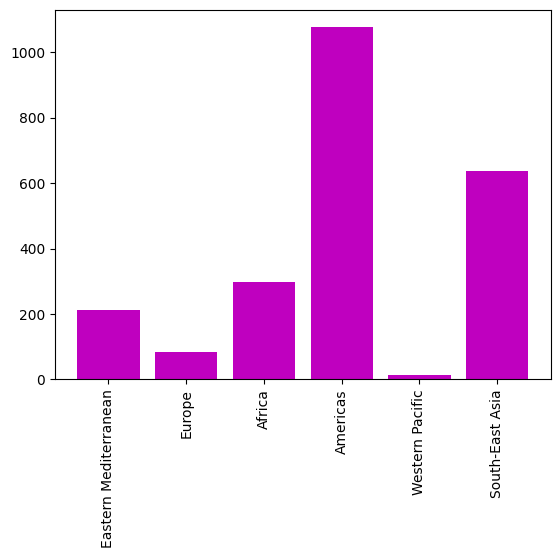

In [34]:
plt.bar(corona["WHO Region"],corona["New deaths"],color="m")
plt.xticks(rotation = 90)
plt.show()

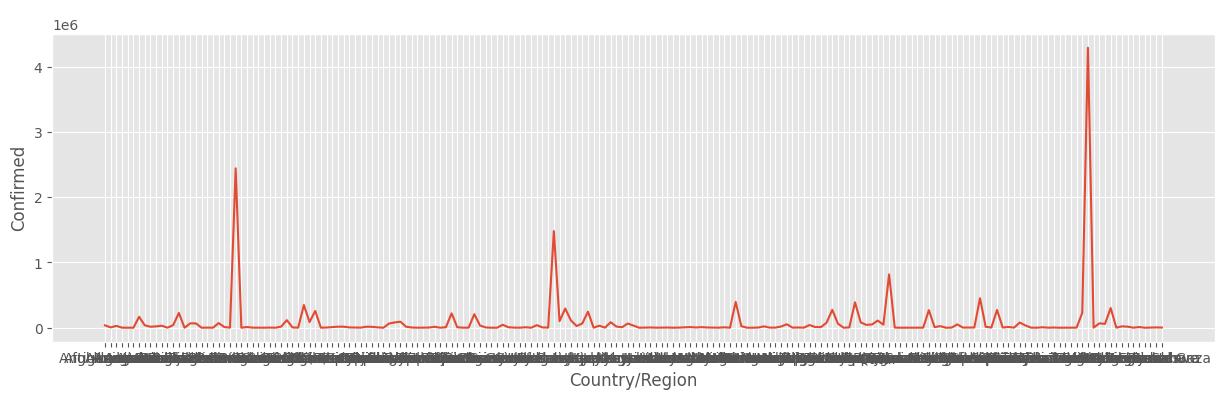

In [36]:
#Plotting Confirmed case countrywise
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
plt.plot(corona['Country/Region'],corona['Confirmed'])
plt.xlabel("Country/Region")
plt.ylabel('Confirmed')
plt.title('Confirmed case countrywise', fontsize=16, fontweight='bold', style='italic')
plt.show()

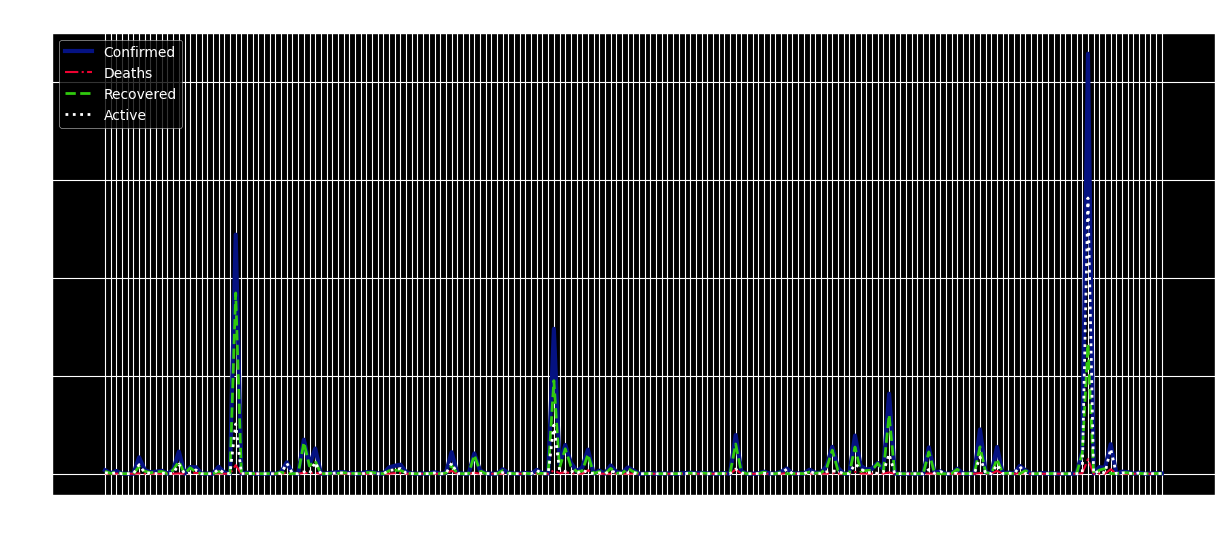

In [37]:
#plt.style.use('ggplot')
plt.figure(figsize = (15,6))
plt.style.use('dark_background')

# Plotting Confirmed cases
plt.plot(corona['Country/Region'], corona['Confirmed'],linestyle = '-',color = '#051282',label = 'Confirmed',lw = 3)

# Plotting Deaths
plt.plot(corona['Country/Region'], corona['Deaths'],linestyle = '-.',color = '#ed0231',label = 'Deaths')

# Plotting Recovered cases
plt.plot(corona['Country/Region'],corona['Recovered'],linestyle = '--',color = '#30c90e',label = 'Recovered',lw = 2)

# Plotting active cases
plt.plot(corona['Country/Region'], corona['Active'],linestyle = ':',color = 'w',label = 'Active',lw = 2)
plt.xlabel('Country/Region')
plt.ylabel('Num: of cases (in millions)')
plt.title('Global Trend of Covid Cases')
plt.legend()
plt.show()

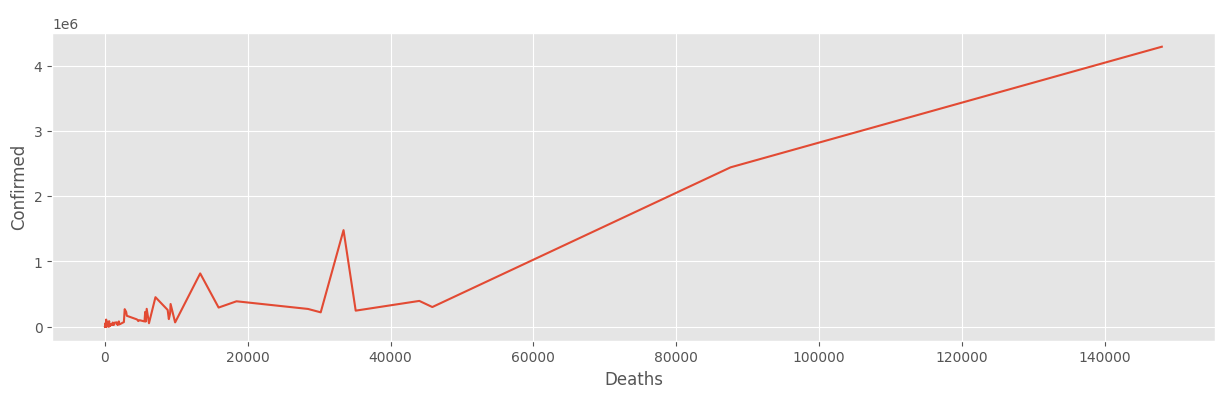

In [40]:
#Plotting Death case vs Confirmed case
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Deaths", y = "Confirmed", data = corona)
plt.xlabel("Deaths")
plt.ylabel('Confirmed')
plt.title('Confirmed case vs Deathcase')
plt.show()

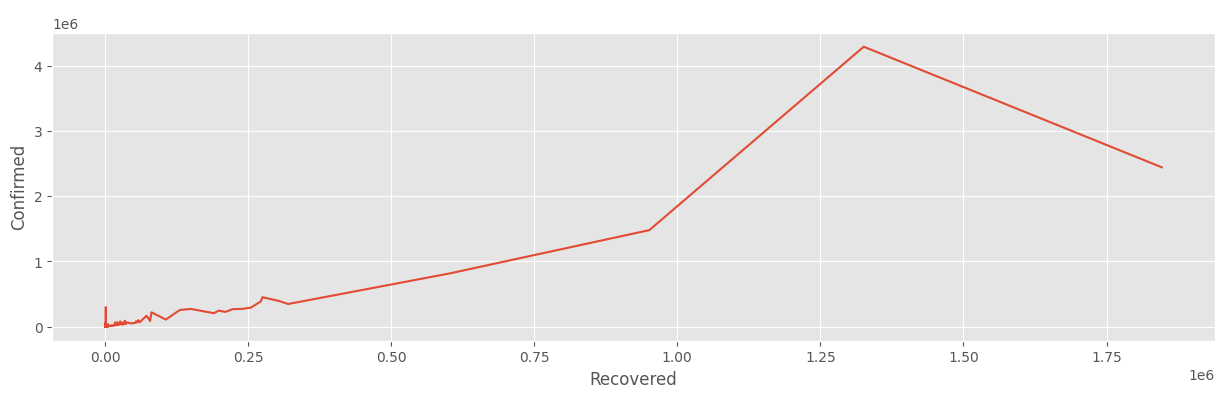

In [41]:
#Plotting Recovered case vs confirmed case
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Recovered", y = "Confirmed", data = corona)
plt.xlabel("Recovered")
plt.ylabel('Confirmed')
plt.title('Confirmed case vs Recoveredcase')
plt.show()

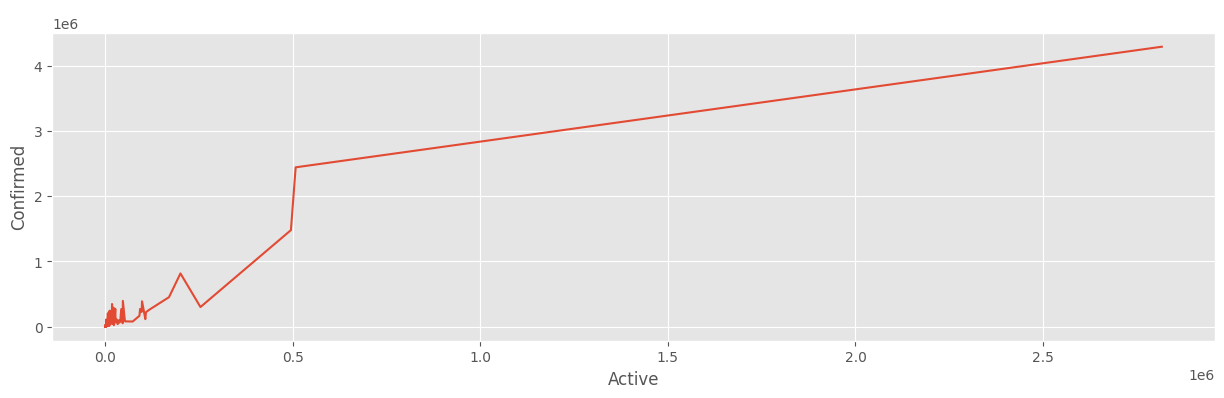

In [43]:
#Plotting Active case Vs Confirmed case
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x = "Active", y= 'Confirmed', data = corona)
plt.xlabel("Active")
plt.ylabel('Confirmed')
plt.title('Confirmed case vs Activecase')
plt.show()

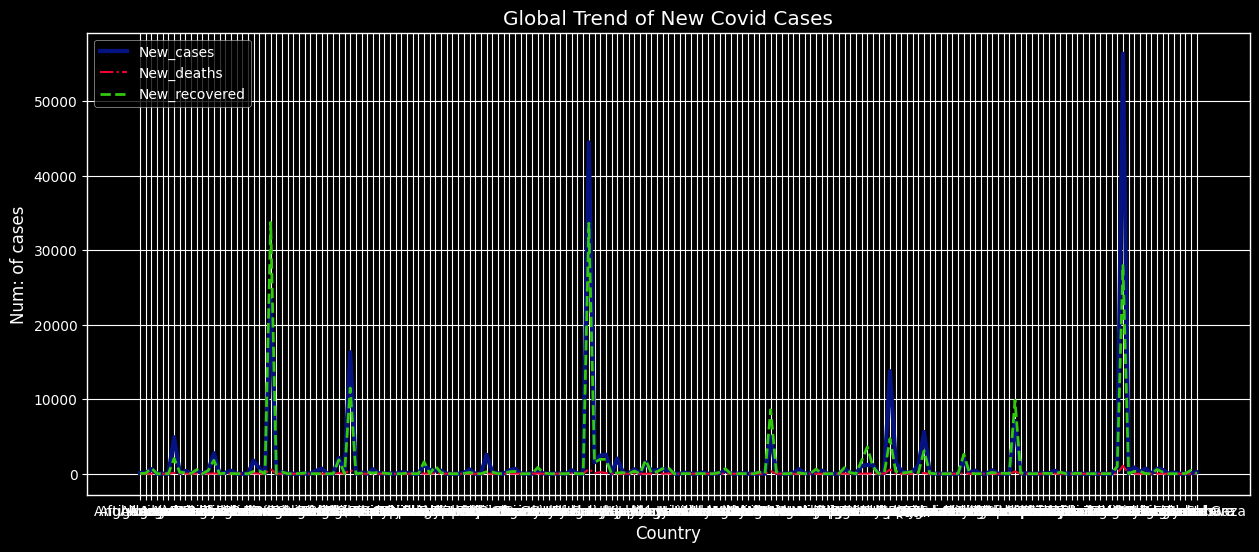

In [45]:
#plt.style.use('ggplot')
plt.figure(figsize = (15,6))
plt.style.use('dark_background')

# Plotting New cases
plt.plot(corona['Country/Region'], corona['New cases'],linestyle = '-',color = '#051282',label = 'New_cases',lw = 3)

# Plotting New Death cases
plt.plot(corona['Country/Region'],corona['New deaths'],linestyle = '-.',color = '#ed0231',label = 'New_deaths')

# Plotting New Recovered cases
plt.plot(corona['Country/Region'], corona['New recovered'],linestyle = '--',color = '#30c90e',label = 'New_recovered',lw = 2)
plt.xlabel('Country')
plt.ylabel('Num: of cases')
plt.title('Global Trend of New Covid Cases')
plt.legend()
plt.show()

In [48]:
#Confirmed Case of WHO Reason wise
Who_regionscon =corona.groupby('WHO Region')['Confirmed'].sum().sort_values()
print(Who_regionscon)


#Data Visullization of Confirmed Case of WHO Reason

#bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize=(9, 4))
sns.barplot(x="WHO Region", y= 'Confirmed',data = corona, palette='pastel')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionscon, labels=Who_regionscon.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title("Confirmed case vs Who Region")
plt.show()

WHO Region
Western Pacific           292428
Africa                    723207
Eastern Mediterranean    1490744
South-East Asia          1835297
Europe                   3299523
Americas                 8839286
Name: Confirmed, dtype: int64


OSError: 'white_background' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

WHO Region
Western Pacific            8249
Africa                    12223
Eastern Mediterranean     38339
South-East Asia           41349
Europe                   211144
Americas                 342732
Name: Deaths, dtype: int64


<ipython-input-49-dac5e7830ce3>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




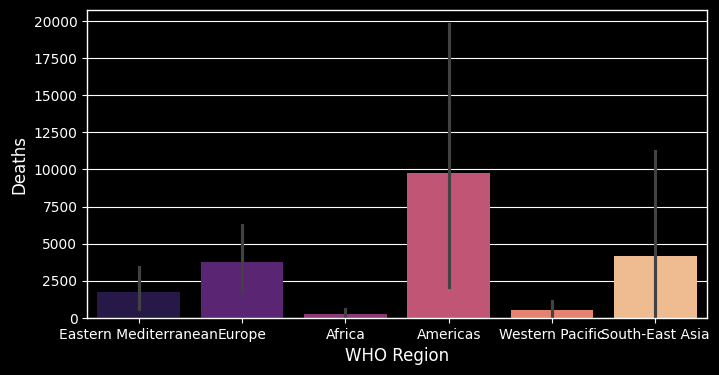

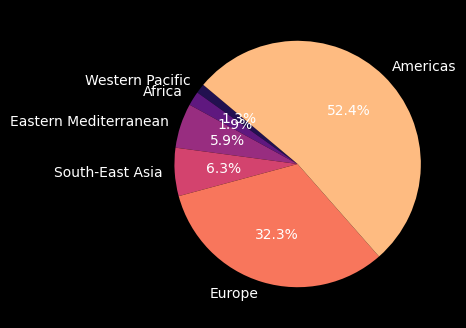

In [49]:
#Death case Who Reason wise
Who_regionsdea = corona.groupby('WHO Region')['Deaths'].sum().sort_values()
print(Who_regionsdea)


#Data Visullization Deathcase of WHO Region

#Bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize = (8,4))
sns.barplot(x="WHO Region", y= 'Deaths',data = corona, palette='magma')

#piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionsdea, labels=Who_regionsdea.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('magma'))
plt.show()

WHO Region
Western Pacific           206770
Africa                    440645
South-East Asia          1156933
Eastern Mediterranean    1201400
Europe                   1993723
Americas                 4468616
Name: Recovered, dtype: int64


<ipython-input-50-d3aa7f226e32>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




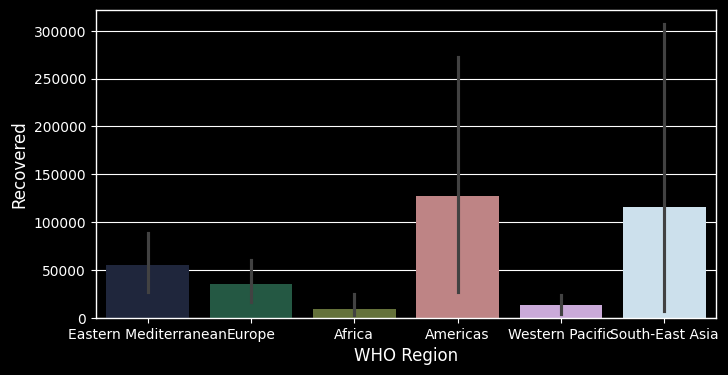

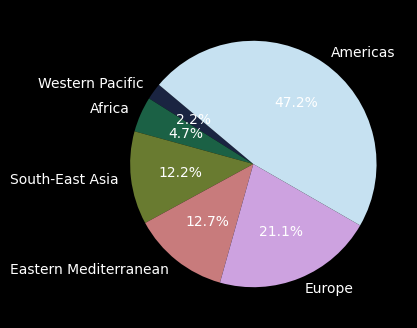

In [50]:
#Recovered case WHO Reason wise
Who_regionsrec = corona.groupby('WHO Region')['Recovered'].sum().sort_values()
print(Who_regionsrec)


# Data Visullization of Recovered case of Who Region

#Bar Plot
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize = (8,4))
sns.barplot(x="WHO Region", y= 'Recovered',data = corona, palette='cubehelix')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionsrec, labels=Who_regionsrec.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('cubehelix'))
plt.show()

WHO Region
Western Pacific            77409
Eastern Mediterranean     251005
Africa                    270339
South-East Asia           637015
Europe                   1094656
Americas                 4027938
Name: Active, dtype: int64


<ipython-input-51-9cc8315e2f1d>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




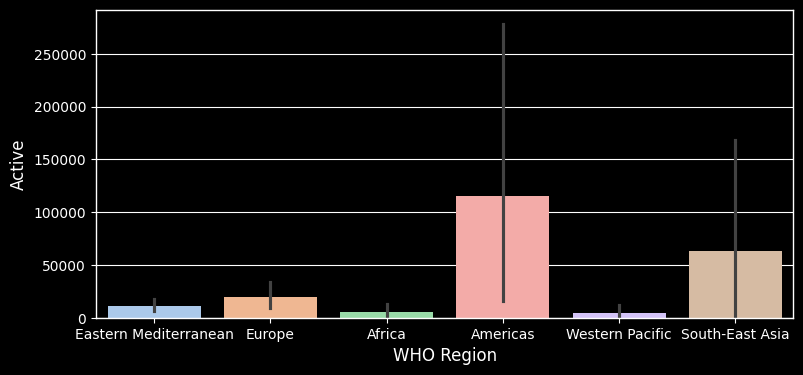

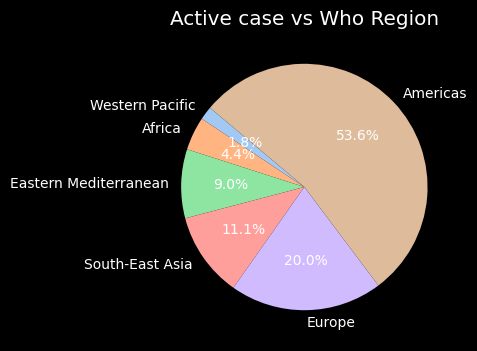

In [51]:
#Active Case of WHO Reason wise
Who_regionsact = corona.groupby('WHO Region')['Active'].sum().sort_values()
print(Who_regionsact)


#Data Visullization of Active Case of WHO Reason

#bar graph
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.figure(figsize=(9, 4))
sns.barplot(x="WHO Region", y= 'Active',data = corona, palette='pastel')

#Piechart
plt.figure(figsize=(4, 4))
plt.pie(Who_regionscon, labels=Who_regionscon.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title("Active case vs Who Region")
plt.show()

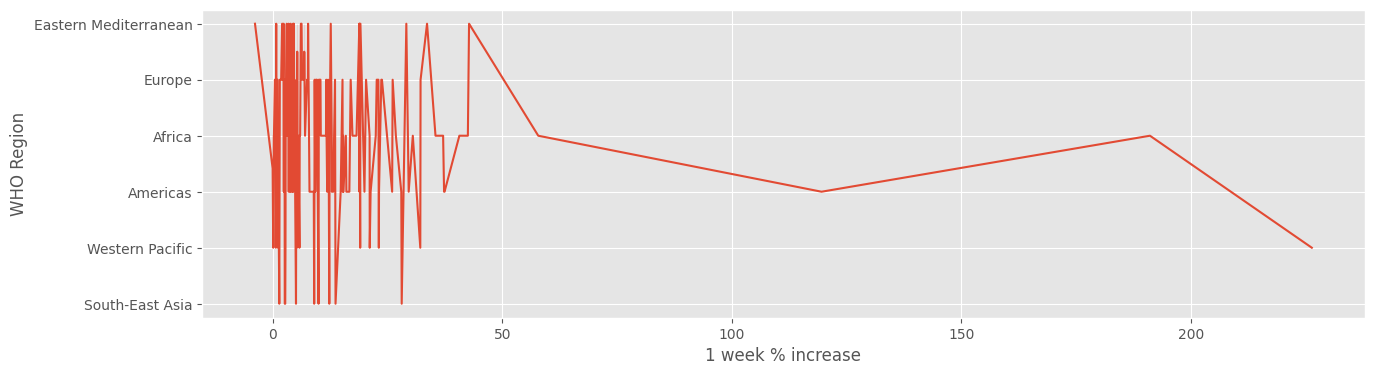

In [52]:
# Data Visullization of 1 week % increase
plt.style.use('ggplot')
plt.figure(figsize= (15, 4))
sns.lineplot(x='1 week % increase', y= "WHO Region", data = corona)
plt.show()

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
119          Nepal      18752      48      13754    4950        139   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
119           3            626                0.26                  73.35   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
119                    0.35                17844            908   

     1 week % increase       WHO Region  
119               5.09  South-East Asia  


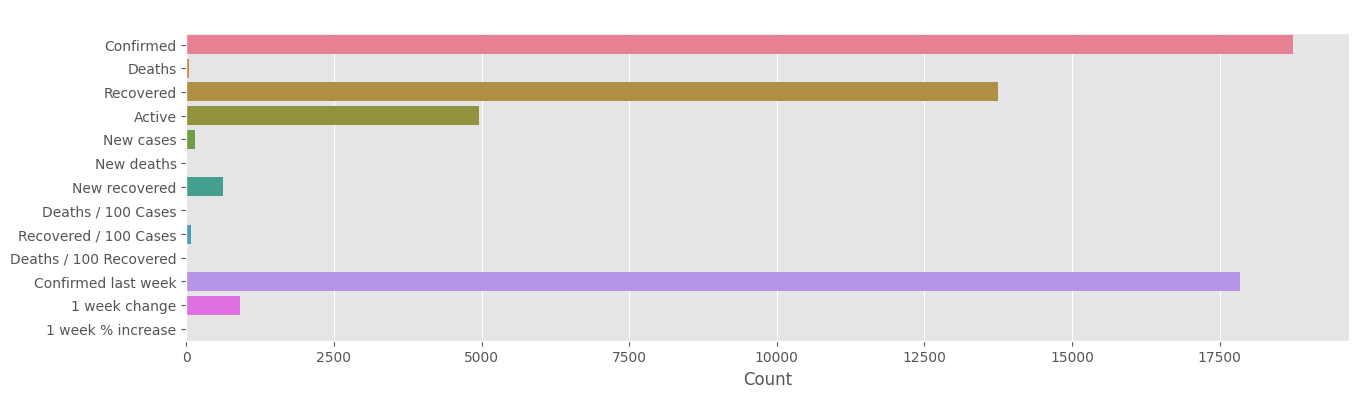

In [54]:
# Data loading of Nepal
nepal =corona[corona['Country/Region'] == 'Nepal']
print(nepal)


# Data Visullization of Nepal
plt.figure(figsize= (15, 4))
sns.barplot(nepal, orient = 'h')
plt.xlabel("Count")
plt.title('Nepal')
plt.show()